In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
from keras.models import load_model

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [29]:
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train, y_train_cat,  test_size=10000, random_state=41)

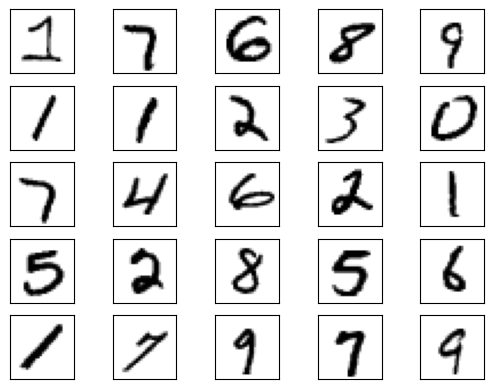

In [30]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_split[i], cmap=plt.cm.binary)

In [31]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(x_train_split, y_train_split, epochs=15, validation_data=(x_valid_split, y_valid_split))

test_loss, test_acc = model.evaluate(x_test, y_test_cat)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.9058 - val_loss: 0.1998 - val_accuracy: 0.9436
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9523 - val_loss: 0.1469 - val_accu

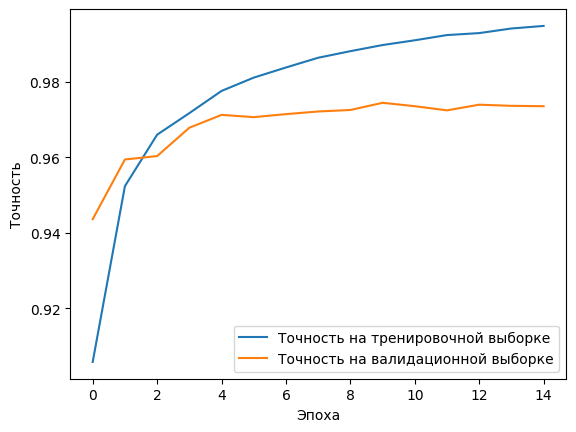

In [32]:
plt.plot(history.history['accuracy'], label='Точность на тренировочной выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

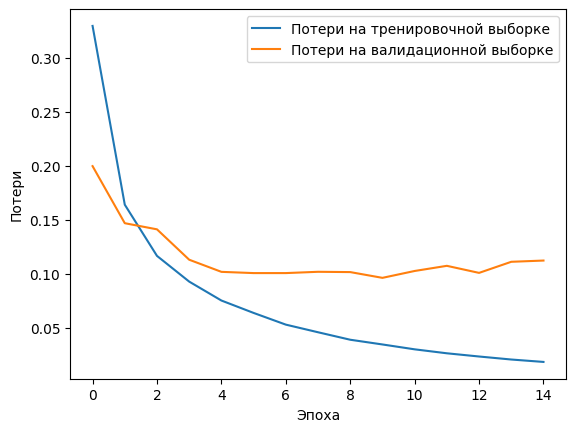

In [33]:
plt.plot(history.history['loss'], label='Потери на тренировочной выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [34]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 [==============================] - 1s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Значение сети: 8


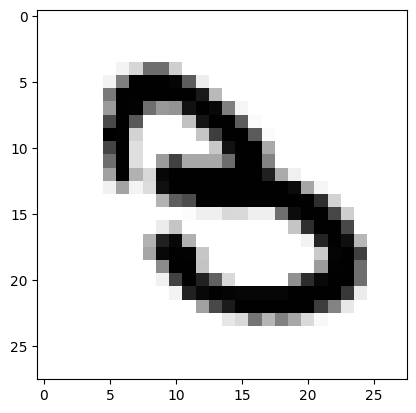

Значение сети: 2


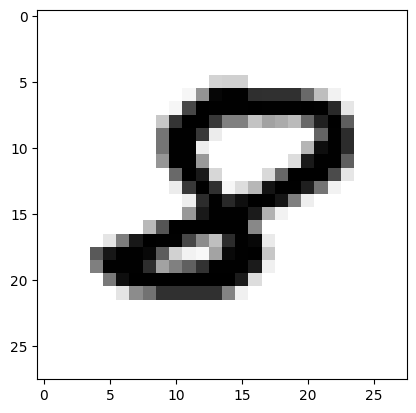

Значение сети: 9


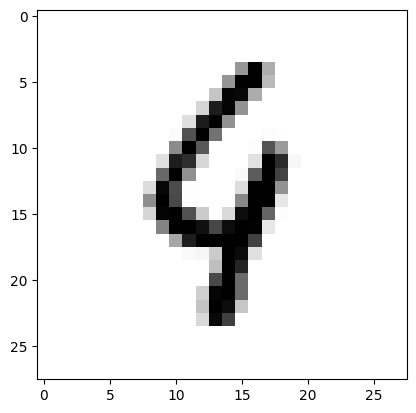

Значение сети: 6


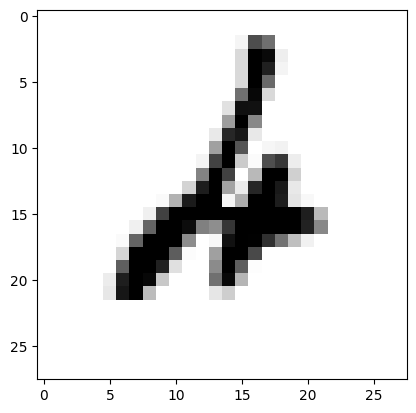

Значение сети: 7


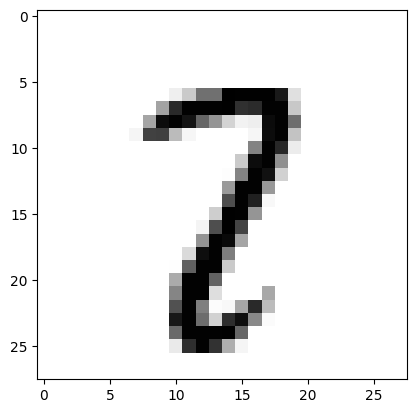

In [35]:
mask = pred == y_test

x_false = x_test[~mask]
p_false = pred[~mask]


for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [36]:
x_train_split_min, x_valid_split_min, y_train_split_min, y_valid_split_min = train_test_split(x_train, y_train_cat, train_size=20000, random_state=42)

In [37]:
history = model.fit(x_train_split_min, y_train_split_min, epochs=100, validation_data=(x_valid_split_min, y_valid_split_min))
model.evaluate(x_test, y_test_cat)

Epoch 1/100
625/625 [==============================] - 4s 7ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0202 - accuracy: 0.9947 - val_loss: 0.0372 - val_accuracy: 0.9899
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0365 - val_accuracy: 0.9899
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0375 - val_accuracy: 0.9889

[0.2040865570306778, 0.9735000133514404]

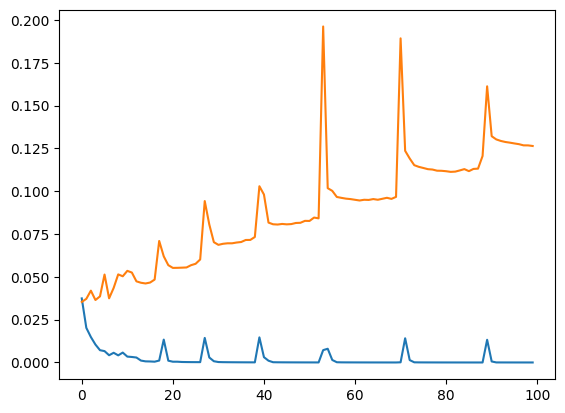

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [39]:
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu']
results = []

for activation_function in activation_functions:
    model = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation=activation_function),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


    history = model.fit(x_train_split_min, y_train_split_min, epochs=10, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)

    loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    results.append({'activation_function': activation_function, 'accuracy': accuracy})

for result in results:
    print(f'{result["activation_function"]}: {result["accuracy"]}')

linear: 0.9147999882698059
sigmoid: 0.95169997215271
tanh: 0.9575999975204468
relu: 0.9646999835968018


In [40]:
optimizers = {
    'adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'nesterov': tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
}

results = []

for optimizer_name, optimizer in optimizers.items():
    model = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    history = model.fit(x_train_split_min, y_train_split_min, epochs=10, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)

    loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    results.append({'optimizer': optimizer_name, 'accuracy': accuracy})
for result in results:
    print(f'{result["optimizer"]}: {result["accuracy"]}')

adam: 0.9595000147819519
rmsprop: 0.963699996471405
nesterov: 0.9193000197410583


In [41]:

model_without_bias = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation='relu', use_bias=False),
        Dense(10, activation='softmax', use_bias=False)
    ])

model_with_bias = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
model_without_bias.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_with_bias.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_without_bias = model_without_bias.fit(x_train_split_min, y_train_split_min, epochs=10, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)
history_with_bias = model_with_bias.fit(x_train_split_min, y_train_split_min, epochs=10, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)

loss_without_bias, accuracy_without_bias = model_without_bias.evaluate(x_test, y_test_cat, verbose=0)
loss_with_bias, accuracy_with_bias = model_with_bias.evaluate(x_test, y_test_cat, verbose=0)

print(f'without Bias: {accuracy_without_bias}')
print(f'with Bias: {accuracy_with_bias}')

without Bias: 0.9670000076293945
with Bias: 0.9639000296592712


In [42]:
loss_functions = {
    'binary_crossentropy',
    'categorical_crossentropy',
    'mean_squared_error'
}


results = []

for loss_function in loss_functions:
    model = keras.Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss=loss_function,
                metrics=['accuracy'])


    history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)

    loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    results.append({'loss_function': loss_function, 'accuracy': accuracy})

for result in results:
    print(f'{result["loss_function"]}: {result["accuracy"]}')

mean_squared_error: 0.9739999771118164
binary_crossentropy: 0.9758999943733215
categorical_crossentropy: 0.9742000102996826


In [43]:
batch_sizes = [16, 32, 64, 128]

results = []

for batch_size in batch_sizes:
    model = keras.Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


    history = model.fit(x_train_split_min, y_train_split_min, epochs=10,batch_size=batch_size, validation_data=(x_valid_split_min, y_valid_split_min), verbose=0)

    loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    results.append({'batch_size': batch_size, 'accuracy': accuracy})

for result in results:
    print(f'{result["batch_size"]}: {result["accuracy"]}')

16: 0.9671000242233276
32: 0.9646999835968018
64: 0.9599000215530396
128: 0.9544000029563904
